In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob



In [19]:
# usar glob para expresiones regulares
us_census = glob("states*")
us_census

# iterar por todas las listas que se llamen states...
list_1 = []
for x in us_census:
    data = pd.read_csv(x)
    list_1.append(data)
  

In [20]:
us_census = pd.concat(list_1)

print(us_census.head())
print(us_census.dtypes)

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296

In [21]:
# quitar el signo peso y transformar el objeto en float
us_census.Income = us_census['Income'].replace('[\$,]', '', regex=True)
us_census.Income = pd.to_numeric(us_census.Income)
print(us_census.dtypes)



Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object


In [24]:
# dividir la columna GenderPop es masculino y femenino
split_gender = us_census['GenderPop'].str.split('_', expand=True)
us_census['male'] = split_gender[0].str.split('(\d+)', expand=True)[1]
us_census['female'] = split_gender[1].str.split('(\d+)', expand=True)[1]

us_census.head(2)



,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male,female
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215


In [25]:
# quitar la M y la F de la columna y transformarlo en float
us_census.male = us_census['male'].replace('[\w,]', '', regex=True)
us_census.male = pd.to_numeric(us_census.male)

us_census.female = us_census['female'].replace('[\w,]', '', regex=True)
us_census.female = pd.to_numeric(us_census.female)

print(us_census.female)
print(us_census.dtypes)
print(us_census.head())
print(us_census.female.mean())



0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: female, dtype: float64
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
male          float64
female        float64
dtype: object
   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    

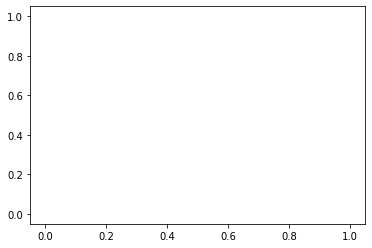

In [26]:
# mostrar el grafivo M v/s F ... pero todos los valores son Null
plt.scatter(us_census.male, us_census.female)
plt.show()



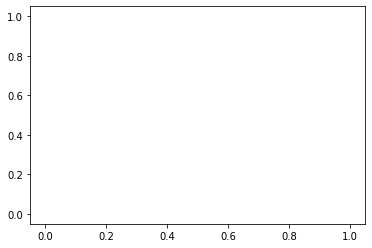

In [27]:
valores = us_census['TotalPop'] - us_census['male']
us_census['female'] = us_census['female'].fillna(value=valores)

us_census['female'] = pd.to_numeric(us_census['female'])
us_census['male'] = pd.to_numeric(us_census['male'])

plt.scatter(us_census.male, us_census.Income)
plt.show()
